In [ ]:
pip install pytrends

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 729.0 kB/s  0:00:07 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pytrends]1/2 [pytrends]
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly 


  Using cached narwhals-2.15.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.2 MB/s  0:00:08m0:00:0100:01
Using cached narwhals-2.15.0-py3-none-any.whl (432 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from pytrends.request import TrendReq


Setup pytrend library and define keyword 

In [3]:
pytrends = TrendReq(hl = 'en-US' , tz= 360) # hl(language) , tz(timezone)
keyword = 'AI'

In [4]:
pytrends.build_payload([keyword] , cat = 0 , timeframe= 'today 12-m' , geo = '' , gprop = '') # cat(category) , geo(geography), gprop(google property flter decide the type of google search data do you want)

Country wise intrest

In [5]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by= keyword , ascending = False).head(15)

/tmp/ipykernel_5622/4068930822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_data[keyword] , y = region_data.index , palette='Blues_d')


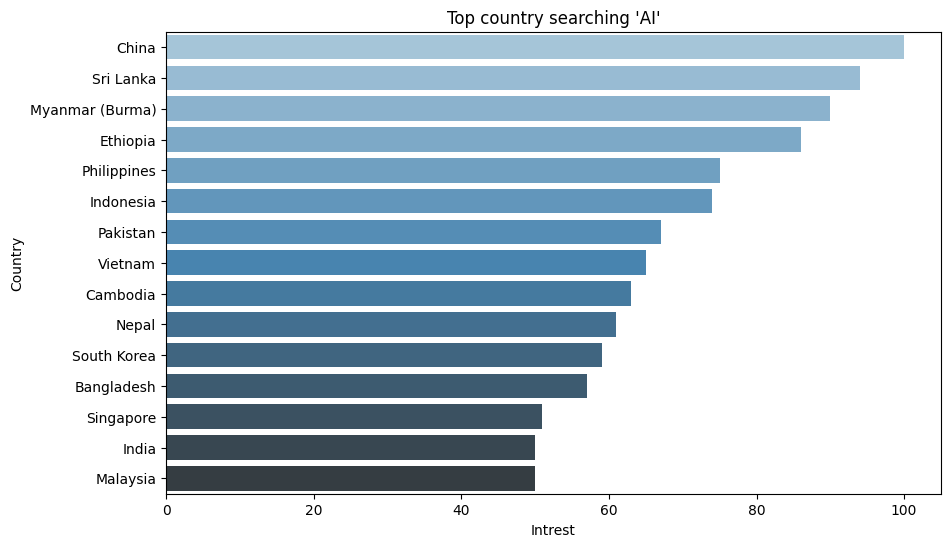

In [6]:
plt.figure(figsize= (10,6))
sns.barplot(x = region_data[keyword] , y = region_data.index , palette='Blues_d')
plt.title(f"Top country searching '{keyword}'")
plt.xlabel("Intrest")
plt.ylabel("Country")
plt.show()

World Map:
choropleth - A choropleth map is a map where areas are colored based on data values.
             . Different regions get different colors
             .color show show big or small the value is 

In [7]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations = 'geoName',
                    locationmode='country names',
                    color = keyword,
                    title=f"Search intrest for '{keyword}' by country",
                    color_continuous_scale='Blues')
fig.show()

/tmp/ipykernel_5622/282875644.py:2: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(region_data,
